In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# import the data into a pandas data frame
bdf = pd.read_csv('data.csv')

In [3]:
bdf.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
# Check for null numbers

bdf.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# Drop last empty column

bdf = bdf.drop(columns=['Unnamed: 32','id'])

In [7]:
bdf.shape

(569, 31)

In [8]:
# Check the count of the predictors

bdf['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
# Convert the predictors into numbers

bdf['diagnosis'].replace(to_replace={'M': 1, "B": 0}, inplace=True)

In [10]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [11]:
bdf['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# Exploratory Data Analysis

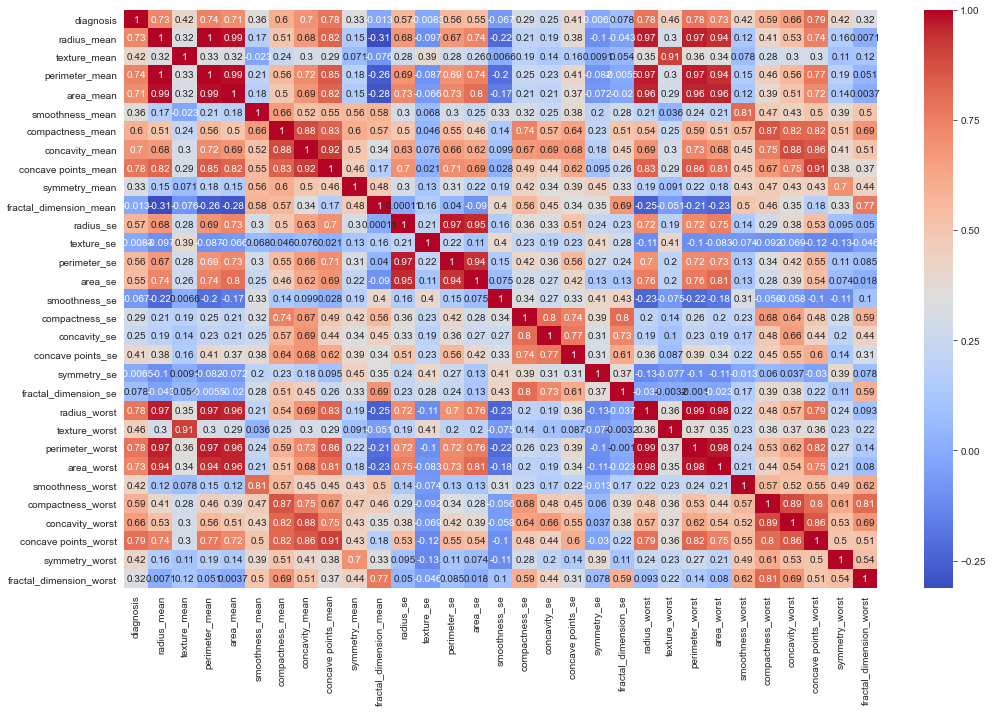

In [12]:
# The number of columns are obviosly a lot
# we might need to perform some feature selection and extraction
# but first, a heatmap

plt.figure(figsize=(15,10))
sns.heatmap(bdf.corr(), annot=True, cmap='coolwarm')
plt.tight_layout()

In [13]:
bdf.corr()['diagnosis']

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

### From the heatmap above,  we can see that out of the 32 attributes, only 15 showed strong correlations, this means that we have a lot of noise.

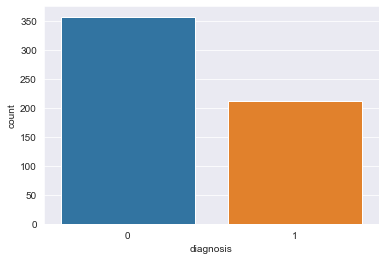

In [14]:
# Visualizing a countplot of our dataset predictor values
sns.countplot(x='diagnosis', data=bdf)

In [15]:
pd.DataFrame({'mean': bdf.mean(), "variance": bdf.var()}, index=bdf.columns)

,mean,variance
diagnosis,0.372583,0.234177
radius_mean,14.127292,12.418920
texture_mean,19.289649,18.498909
perimeter_mean,91.969033,590.440480
area_mean,654.889104,123843.554318
smoothness_mean,0.096360,0.000198
compactness_mean,0.104341,0.002789
concavity_mean,0.088799,0.006355
concave points_mean,0.048919,0.001506
symmetry_mean,0.181162,0.000752


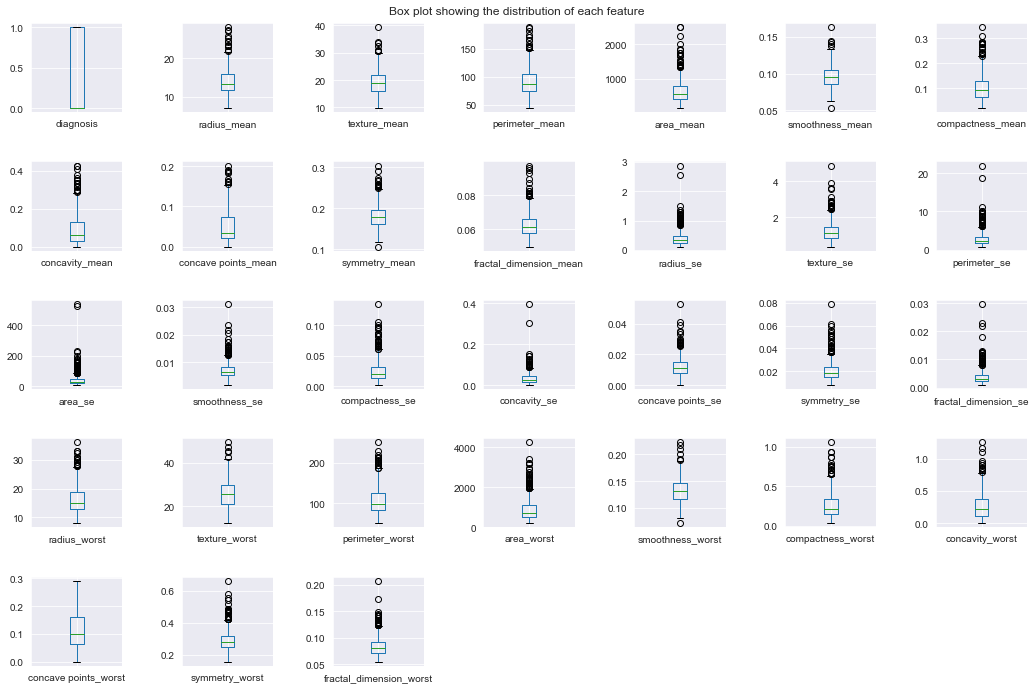

In [16]:
bdf.plot(kind='box',
         subplots=True,
         layout=(5, 7),
         title="Box plot showing the distribution of each feature",
         sharex=False,
         sharey=False,
         figsize=(15, 10))
plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=3.0)

In [17]:
bdf.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
5%,0.000000,9.529200,13.088000,60.496000,275.780000,0.075042,0.040660,0.004983,0.005621,0.141500,...,10.534000,16.574000,67.856000,331.060000,0.095734,0.071196,0.018360,0.024286,0.212700,0.062558
10%,0.000000,10.260000,14.078000,65.830000,321.600000,0.079654,0.049700,0.013686,0.011158,0.149580,...,11.234000,17.800000,72.178000,384.720000,0.102960,0.093676,0.045652,0.038460,0.226120,0.065792
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
90%,1.000000,19.530000,24.992000,129.100000,1177.400000,0.114820,0.175460,0.203040,0.100420,0.214940,...,23.682000,33.646000,157.740000,1673.000000,0.161480,0.447840,0.571320,0.208940,0.360080,0.106320


In [18]:
bdf.std()

diagnosis                    0.483918
radius_mean                  3.524049
texture_mean                 4.301036
perimeter_mean              24.298981
area_mean                  351.914129
smoothness_mean              0.014064
compactness_mean             0.052813
concavity_mean               0.079720
concave points_mean          0.038803
symmetry_mean                0.027414
fractal_dimension_mean       0.007060
radius_se                    0.277313
texture_se                   0.551648
perimeter_se                 2.021855
area_se                     45.491006
smoothness_se                0.003003
compactness_se               0.017908
concavity_se                 0.030186
concave points_se            0.006170
symmetry_se                  0.008266
fractal_dimension_se         0.002646
radius_worst                 4.833242
texture_worst                6.146258
perimeter_worst             33.602542
area_worst                 569.356993
smoothness_worst             0.022832
compactness_

## Feature Engineering

In [19]:
# there is a relationship between the radius, the perimeter and the area
# we would calculate the volume as a new column using our understanding from these relationships
import math

a = (bdf['radius_mean'] * 2) * (bdf['radius_mean'] * 2) * (
    (bdf['perimeter_mean'] - (bdf['radius_mean'] * 2)) / 2) * (math.pi / 6)
b = (bdf['radius_se'] * 2) * (bdf['radius_se'] * 2) * (
    (bdf['perimeter_se'] - (bdf['radius_se'] * 2)) / 2) * (math.pi / 6)
c = (bdf['radius_worst'] * 2) * (bdf['radius_worst'] * 2) * (
    (bdf['perimeter_worst'] - (bdf['radius_worst'] * 2)) / 2) * (math.pi / 6)

bdf2 = pd.DataFrame({'volume_mean': a, 'volume_se': b, 'volume_worst': c})
bdfnew = pd.concat([bdf, bdf2], axis=1)
bdfnew

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,volume_mean,volume_se,volume_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,29424.610735,8.034687,90281.295302
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,40658.430154,0.714871,71165.556828
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,36791.213120,1.801079,61294.787673
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,7475.936758,0.631147,16074.874382
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,40748.950233,2.355779,56991.095527
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,9360.892810,0.181381,18159.654231
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,28983.803678,0.477805,58898.828654
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,12357.335530,0.958741,23309.585506
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,10884.047748,0.176198,18900.129617
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,9600.295580,0.133906,16088.583457


# This shows that we have a binary classification problem with an imbalanced dataset

In [20]:
# Seeing that we have a huge number of columns we can't properly visualize the relationship of our dataset
# we would need to take care of the noise and also the imbalance in the data
# We also have outliers in our data
# we could apply simplicity to visualise the data by reducing it to 2 pca component

# Principal component analyis

### first we would compress the dataset using pca analysis

In [229]:
# separating the data into X and Y variables
X = bdf.drop('diagnosis', axis=1)
y = bdf['diagnosis']

print(X.shape, y.shape)

(569, 30) (569,)


In [230]:
X, y

(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 0         17.990         10.38          122.80     1001.0          0.11840   
 1         20.570         17.77          132.90     1326.0          0.08474   
 2         19.690         21.25          130.00     1203.0          0.10960   
 3         11.420         20.38           77.58      386.1          0.14250   
 4         20.290         14.34          135.10     1297.0          0.10030   
 5         12.450         15.70           82.57      477.1          0.12780   
 6         18.250         19.98          119.60     1040.0          0.09463   
 7         13.710         20.83           90.20      577.9          0.11890   
 8         13.000         21.82           87.50      519.8          0.12730   
 9         12.460         24.04           83.97      475.9          0.11860   
 10        16.020         23.24          102.70      797.8          0.08206   
 11        15.780         17.89          103.60     

In [23]:
# running X through a variance selector

#from sklearn.feature_selection import VarianceThreshold
#selector = VarianceThreshold()


In [231]:
# importing the needed modules
# ssince our data contains outliers we need to use either robust_scale and RobustScaler instead of StandardScaler
# passing our X predictors through our pipeline
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = scale.fit_transform(X)
X.shape

(569, 30)

In [26]:
np.mean(scaled_X), np.std(scaled_X), np.max(scaled_X), np.min(scaled_X)

(1.2487570048507913e-18, 1.0, 12.072680399588068, -3.1120847879199807)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_X)

In [28]:
x_pca.shape

(569, 2)

No handles with labels found to put in legend.


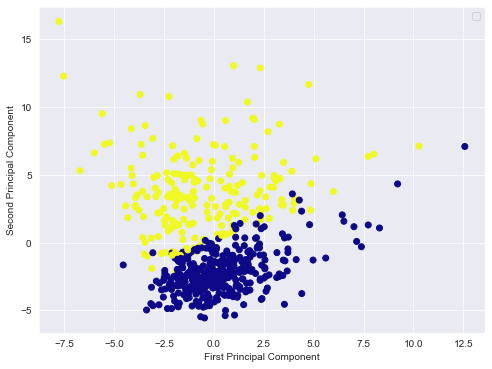

In [29]:
# Visualizing the pca components

plt.figure(figsize =(8,6))
plt.scatter(y=x_pca[:, 0], x = x_pca[:, 1], c=y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

# Building our model

# Spliting the model into test and train data

In [232]:
from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in ss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [233]:
len(X)

569

# Using catboost classifier

In [234]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(random_seed=10,  verbose=10)

cat_model.fit(X_train, y_train)

Learning rate set to 0.00736
0:	learn: 0.6818212	total: 18.5ms	remaining: 18.4s
10:	learn: 0.5782492	total: 123ms	remaining: 11.1s
20:	learn: 0.4914145	total: 200ms	remaining: 9.35s
30:	learn: 0.4202416	total: 268ms	remaining: 8.39s
40:	learn: 0.3654208	total: 421ms	remaining: 9.86s
50:	learn: 0.3192717	total: 500ms	remaining: 9.31s
60:	learn: 0.2818690	total: 567ms	remaining: 8.73s
70:	learn: 0.2522496	total: 643ms	remaining: 8.41s
80:	learn: 0.2264843	total: 712ms	remaining: 8.08s
90:	learn: 0.2034797	total: 780ms	remaining: 7.8s
100:	learn: 0.1848078	total: 860ms	remaining: 7.66s
110:	learn: 0.1686761	total: 945ms	remaining: 7.57s
120:	learn: 0.1548403	total: 1.02s	remaining: 7.41s
130:	learn: 0.1424687	total: 1.09s	remaining: 7.22s
140:	learn: 0.1316209	total: 1.16s	remaining: 7.05s
150:	learn: 0.1222981	total: 1.24s	remaining: 6.97s
160:	learn: 0.1137481	total: 1.32s	remaining: 6.87s
170:	learn: 0.1057997	total: 1.39s	remaining: 6.73s
180:	learn: 0.0989940	total: 1.47s	remaining: 

In [235]:
# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

pred = cat_model.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

[[72  0]
 [ 4 38]]


# We Achieved a 96 percent accuracy and unfortunately we got 4 false positives

In [104]:
len(X_train)

455

In [105]:
len(X_test)

114

# using a neural network

In [109]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.models import Sequential


# Setting random seed for reproducible results

from tensorflow.python.client import device_lib 

np.random.seed(42)
tf.random.set_seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18399035458073261618
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1416432436
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8691413315803635026
physical_device_desc: "device: 0, name: GeForce MX150, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [411]:
nn = Sequential()
nn.add(Dense(16, activation='relu', input_dim=30))
#nn.add(Dropout(0.1))

nn.add(Dense(9, activation='relu'))
#nn.add(Dropout(0.1))

nn.add(Dense(7, activation='relu'))
#nn.add(Dropout(0.1))


nn.add(Dense(1, activation='sigmoid'))


nn.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_230 (Dense)            (None, 16)                496       
_________________________________________________________________
dense_231 (Dense)            (None, 9)                 153       
_________________________________________________________________
dense_232 (Dense)            (None, 7)                 70        
_________________________________________________________________
dense_233 (Dense)            (None, 1)                 8         
Total params: 727
Trainable params: 727
Non-trainable params: 0
_________________________________________________________________


In [412]:
nn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [413]:
#mc = [tf.keras.callbacks.ModelCheckpoint('cifar10.h5', save_best_only=True, mode='min')]
nn.fit(X_train, y_train, epochs=7, batch_size=1, callbacks=mc)

Train on 455 samples
Epoch 1/7
455/455 [==============================] - 2s 5ms/sample - loss: 0.2062 - accuracy: 0.9451
Epoch 2/7
455/455 [==============================] - 2s 4ms/sample - loss: 0.0934 - accuracy: 0.9736
Epoch 3/7
455/455 [==============================] - 2s 4ms/sample - loss: 0.0916 - accuracy: 0.9780
Epoch 4/7
455/455 [==============================] - 2s 4ms/sample - loss: 0.1025 - accuracy: 0.9802
Epoch 5/7
455/455 [==============================] - 2s 4ms/sample - loss: 0.0929 - accuracy: 0.9824
Epoch 6/7
455/455 [==============================] - 2s 4ms/sample - loss: 0.0915 - accuracy: 0.9802
Epoch 7/7
455/455 [==============================] - 2s 4ms/sample - loss: 0.0893 - accuracy: 0.9824


In [414]:
pred2 = nn.predict(X_test)
pred2 = [1 if x>= 0.5 else 0 for x in pred2]

print(classification_report(y_test, pred2))
print(confusion_matrix(y_test, pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

[[72  0]
 [ 1 41]]
